# Introduction

> Customer segmentation is a crucial aspect of marketing analysis, as it allows businesses to group customers based on shared characteristics and behaviors, enabling more targeted and effective marketing strategies.

The common strategies for customer segmentation:
1. Demographic Segmentation:
> This involves dividing customers based on demographic factors such as age, gender, income, education, occupation, marital status, and location.

2. Geographic Segmenetation:
>  Geographic segmentation divides customers based on their geographic location, such as country, region, city, or even neighborhood.

3. Psychographic Segmentation:
> Psychographic segmentation categorizes customers based on their lifestyle, values, beliefs, personality traits, interests, and attitudes.

4. Behavioral Segmentation:
> Behavioral segmentation divides customers based on their past behaviors, interactions, and purchase patterns. 

5. Value-Based Segmentation:
> Value-Based Segmentation: Value-based segmentation categorizes customers based on their economic value to the business, such as total revenue generated, profitability, or lifetime value.

# Exercise

For this exercise, we will be using one of the publicly available datasets from the UCI Machine Learning Repository, which can be found at this link: http://archive.ics.uci.edu/ml/datasets/online+retail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/Online Retail.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# Data cleanup

# Dropping canceled orders
df = df.loc[df['Quantity'] > 0]

# Dropping records with no CustomerID
df = df[pd.notnull(df['CustomerID'])]

# Excluding an incomplete month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Creating Sales feature
df['Sales'] = df['Quantity'] * df['UnitPrice']

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380620 entries, 0 to 516368
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    380620 non-null  object        
 1   StockCode    380620 non-null  object        
 2   Description  380620 non-null  object        
 3   Quantity     380620 non-null  int64         
 4   InvoiceDate  380620 non-null  datetime64[ns]
 5   UnitPrice    380620 non-null  float64       
 6   CustomerID   380620 non-null  float64       
 7   Country      380620 non-null  object        
 8   Sales        380620 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.0+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
# Per-customer data

customers = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

customers.columns = ['TotalSales', 'OrderCount']
customers['AvgOrderValue'] = customers['TotalSales'] / customers['OrderCount']
customers.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000


NOTE:
- Clustering algorithms are highly affected by the scales of the data, so we need to normalize this data to be on the same scale. 
- We are going to take two steps to normalize this data: 
    1. We are going to rank the data, so that the values of each column range from 1 to 4298, which is the total number of records.
    2. Normalize tha data.

In [6]:
# 1. Rank the data
rank_df = customers.rank(method='first')
rank_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0


In [11]:
# 2. Normalize the data
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622


In [12]:
normalized.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


In [13]:
# Customer segmentation via K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_
    )
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 4 Clusters: 0.4111


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 Clusters: 0.3775


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 6 Clusters: 0.3784


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 7 Clusters: 0.3911


C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 8 Clusters: 0.3812


In [21]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

C:\Users\Baha Tegar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,1
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,1
12350.0,-0.732148,-1.729835,0.331622,1


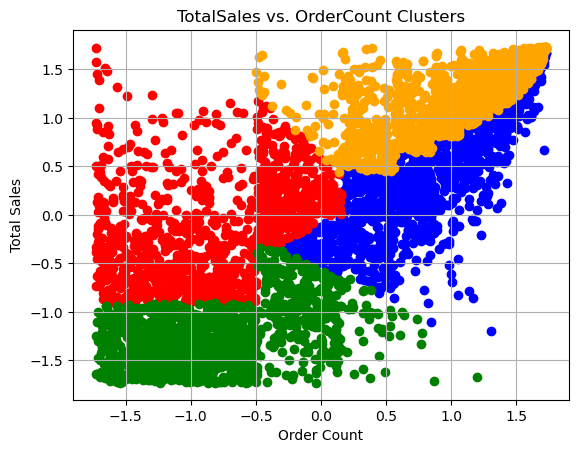

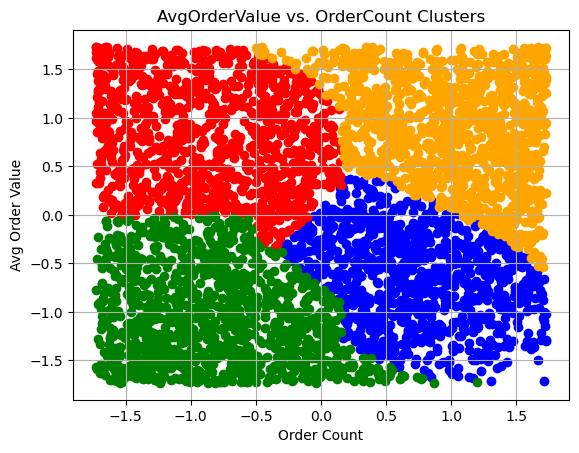

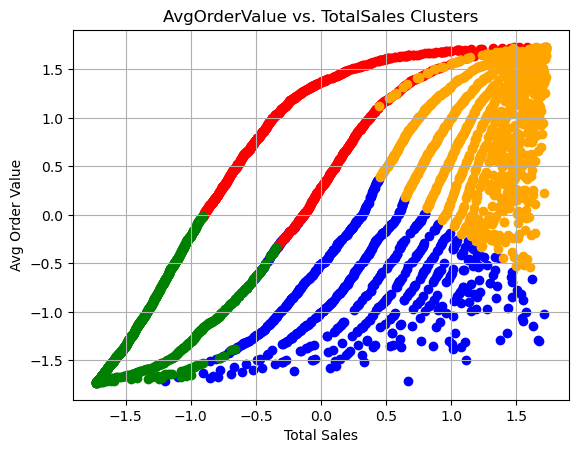

In [24]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()


plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

In [23]:
kmeans.cluster_centers_

array([[ 0.22888789,  0.72574146, -0.64245176],
       [-0.13723954, -0.85002014,  0.79054937],
       [ 1.20441747,  1.00058583,  0.87243288],
       [-1.2440054 , -0.7917182 , -1.06203644]])

NOTES:
- The cluster green: Low-value customers; low sales and low order.
- The cluster red: High-sales customers; high sales but low order. (Interest in expensive items)
- The cluster blue: High-order customers; high order but low sales.
- The cluster yellow: The high-value customers; high order and high sales.

In [27]:
# Top product (high value cluster)

high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]

pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1140
REGENCY CAKESTAND 3 TIER,1080
WHITE HANGING HEART T-LIGHT HOLDER,1071
LUNCH BAG RED RETROSPOT,933
PARTY BUNTING,865


In [28]:
# Top product (low value cluster)

low_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3]

pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(low_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REX CASH+CARRY JUMBO SHOPPER,138
WHITE HANGING HEART T-LIGHT HOLDER,135
REGENCY CAKESTAND 3 TIER,80
ASSORTED COLOUR BIRD ORNAMENT,78
BAKING SET 9 PIECE RETROSPOT,72
